In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import binomtest
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

# load data
heart = pd.read_csv('OneDrive/heart_disease.csv')
yes_hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']

# Heart Disease Analysis
## Codecademy Bootcamp - Applied Data Science with Python  

## Heart Disease Research Part I
**Project Overview:**  
This project analyzes patient data from the Cleveland Clinic Foundation to investigate factors associated with heart disease.

#### Cholesterol analysis for patients with heart disease

In [30]:
# find average cholesterol level
chol_hd = yes_hd['chol']
avg_chol_hd = np.mean(chol_hd).round(2)
print(f"Cholesterol level in patients with heart disease is {avg_chol_hd} mg/dl .")

# create the hypothesis test
t_stat, p_two_sided = ttest_1samp(chol_hd, 240)
p_value = (p_two_sided / 2).round(4)
print(f"P-value is {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Cholesterol level in patients with heart disease is 251.47 mg/dl .
P-value is 0.0035
Reject the null hypothesis


#### Cholesterol analysis for patients without heart disease

In [31]:
# find average cholesterol level
chol_no_hd = no_hd['chol']
avg_chol_no_hd = np.mean(chol_no_hd).round(2)
print(f"Cholesterol level in patients without heart disease is {avg_chol_no_hd} mg/dl.")

# create the hypothesis test
t_stat, p_two_sided = ttest_1samp(chol_no_hd, 240)
p_value = (p_two_sided / 2).round(4)
print(f"P-value is {p_value}")

Cholesterol level in patients without heart disease is 242.64 mg/dl.
P-value is 0.264


#### Fasting Blood Sugar Analysis

In [35]:
# find the number of patients in database
num_patients = len(heart)
print(f"The number of patients is {num_patients}")

# calculate the number of patients with fasting blood sugar greater than 120
num_highfbs_patients = np.sum(heart['fbs'] == 1)
print(f"The number of patients with fasting blood sugar greater than 120 is {num_highfbs_patients}")

# calculate the number of individuals with diabetes
num_people_with_d = int(303 * 0.08)
print(num_people_with_d)

# create the binomial test
binom_result = binomtest(
    num_highfbs_patients,
    num_patients, 
    p=0.08, 
    alternative='greater')

p_value = binom_result.pvalue
print(p_value)

if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


The number of patients is 303
The number of patients with fasting blood sugar greater than 120 is 45
24
4.689471951448875e-05
Reject the null hypothesis


## Heart Disease Research – Part I Summary
### Key Findings

**1. Cholesterol Levels (Chol):**  
- Patients with heart disease show **significantly elevated cholesterol levels** compared to those without heart disease.  
- Patients without heart disease do not show significantly high cholesterol.  

**2. Fasting Blood Sugar (FBS):**  
- 45 out of 303 patients (≈14.9%) have fasting blood sugar > 120 mg/dl.  
- This is significantly higher than the expected 8% in the general population.  
- **Binomial test:** p-value = 4.69e-05 → reject the null hypothesis.  

**3. Max Heart Rate During Exercise (Thalach):**  
- Patients with heart disease have **significantly lower max heart rates** than those without heart disease.  
- Indicates a strong association between heart disease and exercise-related heart response.

---

### Conclusion

Cholesterol, fasting blood sugar, and maximum heart rate achieved during exercise are **important indicators of heart disease risk** in this patient sample.  
These findings provide a foundation for further analysis and clinical evaluation.


## Heart Disease Research Part II
**Project Overview:**  
This section investigates associations between heart disease and categorical clinical indicators, including chest pain type and exercise-induced angina.

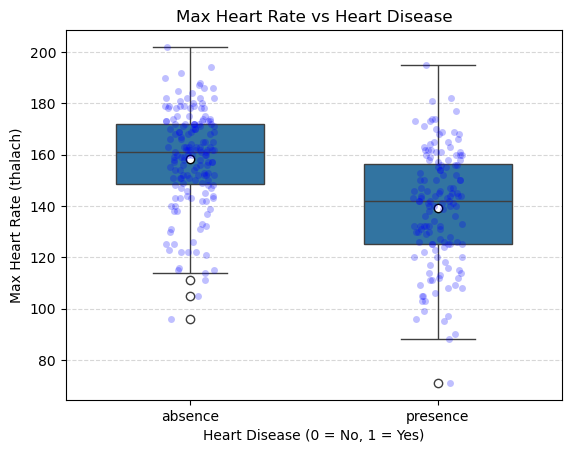

In [22]:
# create boxplots comparing thalach for patients with and without heart disease
plt.clf()

# create the boxplot
sns.boxplot(
    x='heart_disease',
    y='thalach',
    data=heart,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"},
    
    width=0.6
)

# create the stripplot over boxplot
sns.stripplot(
    x="heart_disease",
    y="thalach",
    data=heart,
    alpha=0.25,        
    color="blue"
)

plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Max Heart Rate (thalach)')
plt.title('Max Heart Rate vs Heart Disease')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

#### Calculate the difference in mean thalach for patients diagnosed with heart disease compared to patients without heart disease

In [25]:
# select values for thalach among patients with heart disease
thalach_hd = heart.thalach[heart['heart_disease'] =='presence'] 
print(thalach_hd)

# select values for thalach among patients without heart disease
thalach_no_hd = heart.thalach[heart['heart_disease'] =='absence'] 
print(thalach_no_hd)

# calculate the difference in mean and median
diff_mean = np.mean(thalach_hd) - np.mean(thalach_no_hd)
print('`thalach` mean difference: ', diff_mean)
diff_median = np.median(thalach_hd) - np.median(thalach_no_hd)
print('`thalach` median difference: ', diff_median)

# create the hypothesis test
t_stat, p_value = ttest_ind(
    thalach_hd,
    thalach_no_hd,
    equal_var=True
)

print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


1      108.0
2      129.0
6      160.0
8      147.0
9      155.0
       ...  
297    123.0
298    132.0
299    141.0
300    115.0
301    174.0
Name: thalach, Length: 139, dtype: float64
0      150.0
3      187.0
4      172.0
5      178.0
7      163.0
       ...  
288    163.0
289    169.0
291    166.0
295    182.0
302    173.0
Name: thalach, Length: 164, dtype: float64
`thalach` mean difference:  -19.11905597473242
`thalach` median difference:  -19.0
p-value: 3.456964908430172e-14
Reject the null hypothesis


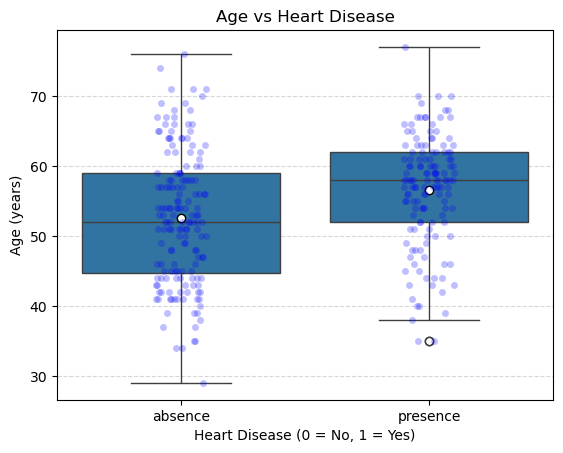

In [32]:
# Create a plot showing age by heart disease status
plt.clf()

# create the boxplot
sns.boxplot(
    x='heart_disease', 
    y='age',
    data=heart,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"}
)

# create the stripplot over boxplot
sns.stripplot(
    x="heart_disease",
    y="age",
    data=heart,
    alpha=0.25,        
    color="blue"
)

plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age (years)")
plt.title("Age vs Heart Disease")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


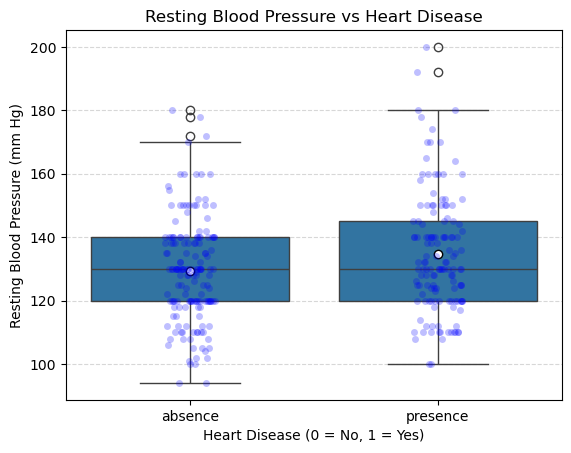

In [33]:
# Create a plot showing resting blood pressure by heart disease status
plt.clf()

# create the boxplot
sns.boxplot(
    x='heart_disease', 
    y='trestbps',
    data=heart,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"}
)

# create the stripplot over boxplot
sns.stripplot(
    x="heart_disease",
    y="trestbps",
    data=heart,
    alpha=0.25,        
    color="blue"
)

plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Resting Blood Pressure (mm Hg)")
plt.title("Resting Blood Pressure vs Heart Disease")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


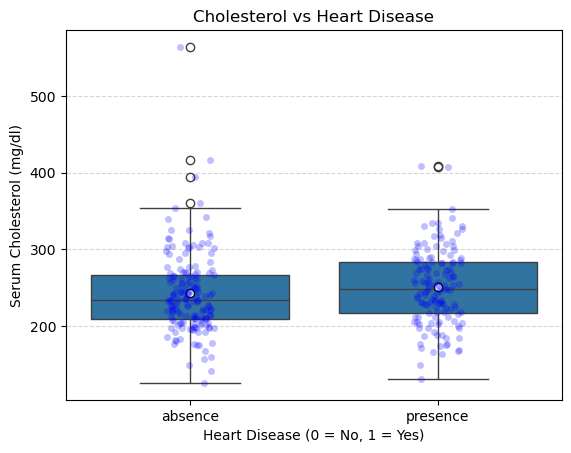

In [36]:
# Create a plot showing colesterol by heart disease status
plt.clf()

# create the boxplot
sns.boxplot(
    x='heart_disease', 
    y='chol',
    data=heart,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"}
)

# create the stripplot over boxplot
sns.stripplot(
    x="heart_disease",
    y="chol",
    data=heart,
    alpha=0.25,        
    color="blue"
)

plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Serum Cholesterol (mg/dl)")
plt.title("Cholesterol vs Heart Disease")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


#### Creathe the hypothesis tests

In [38]:
# for age
age_hd = heart.age[heart['heart_disease'] =='presence'] 
age_no_hd = heart.age[heart['heart_disease'] =='absence'] 
t_stat, p_value = ttest_ind(
    age_hd,
    age_no_hd,
    equal_var=True
)

print("Age, p-value:", p_value)

# for trestbps
trestbps_hd = heart.trestbps[heart['heart_disease'] =='presence'] 
trestbps_no_hd = heart.trestbps[heart['heart_disease'] =='absence'] 
t_stat, p_value = ttest_ind(
    trestbps_hd,
    trestbps_no_hd,
    equal_var=True
)

print("Trestbps, p-value:", p_value)

# for cholesterol
chol_hd = heart.chol[heart['heart_disease'] =='presence'] 
chol_no_hd = heart.chol[heart['heart_disease'] =='absence'] 
t_stat, p_value = ttest_ind(
    chol_hd,
    chol_no_hd,
    equal_var=True
)

print("Cholesterol, p-value:", p_value)

Age, p-value: 8.955636917529706e-05
Trestbps, p-value: 0.008548268928594928
Cholesterol, p-value: 0.13914167020436527


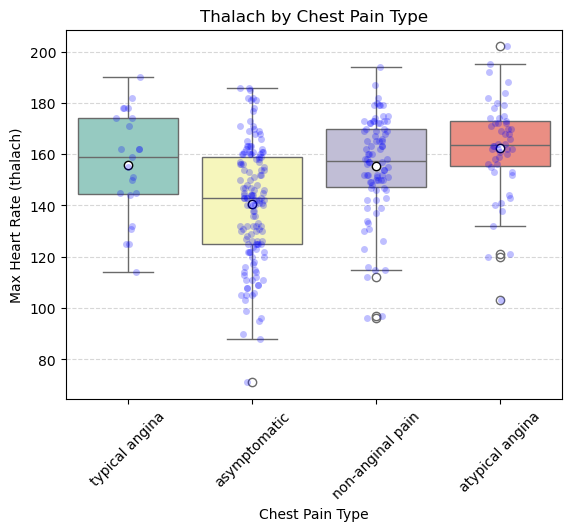

In [43]:
# Visualize the different types of chest pain
plt.clf()

# create the boxplot
sns.boxplot(
    x='cp', 
    y='thalach',
    data=heart,
    hue ='cp',
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"},
    palette="Set3",
    dodge=False
)

# create the stripplot over boxplot
sns.stripplot(
    x='cp', 
    y='thalach',
    data=heart,
    alpha=0.25,        
    color="blue"
)

plt.xlabel("Chest Pain Type")
plt.ylabel("Max Heart Rate (thalach)")
plt.title("Thalach by Chest Pain Type")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


#### Hypothesis test

In [44]:
# select values of talach for all types of chest pain
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

# hypothesis test
from scipy.stats import f_oneway

f_stat, pval = f_oneway(
    thalach_typical,
    thalach_nonangin,
    thalach_atypical,
    thalach_asymptom
)

print("p-value:", pval)


p-value: 1.9065505247705008e-10


#### Tukey’s range test

In [51]:
# Tukey’s range test
thalach_values = pd.concat([thalach_typical, thalach_nonangin, thalach_atypical, thalach_asymptom])

groups = (
    ['typical'] * len(thalach_typical) +
    ['non-anginal'] * len(thalach_nonangin) +
    ['atypical'] * len(thalach_atypical) +
    ['asymptomatic'] * len(thalach_asymptom)
)
tukey_result = pairwise_tukeyhsd(endog=thalach_values, groups=groups)
print(tukey_result)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj   lower    upper  reject
----------------------------------------------------------------
asymptomatic    atypical  21.7394    0.0  12.7442 30.7347   True
asymptomatic non-anginal  14.7264    0.0   7.2583 22.1945   True
asymptomatic     typical   15.276 0.0081   2.9707 27.5812   True
    atypical non-anginal   -7.013 0.2481 -16.7587  2.7327  False
    atypical     typical  -6.4635 0.6213 -20.2702  7.3432  False
 non-anginal     typical   0.5495 0.9995 -12.3145 13.4136  False
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

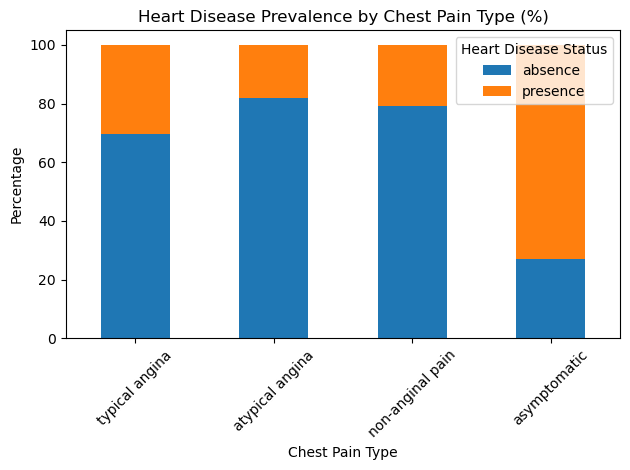

p-value: 2.819626859703792e-18


In [57]:
plt.clf()

# Create percentage contingency table
cp_tab = pd.crosstab(heart.cp, 
                   heart.heart_disease,
                   normalize='index'
                  )*100

# Order rows for readability
x_tab = cp_tab.loc[
    ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
]

x_tab.plot(kind="bar", stacked=True)

# Create stacked bar plot


plt.title("Heart Disease Prevalence by Chest Pain Type (%)")
plt.ylabel("Percentage")
plt.xlabel("Chest Pain Type")
plt.xticks(rotation=45)
plt.legend(title="Heart Disease Status")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

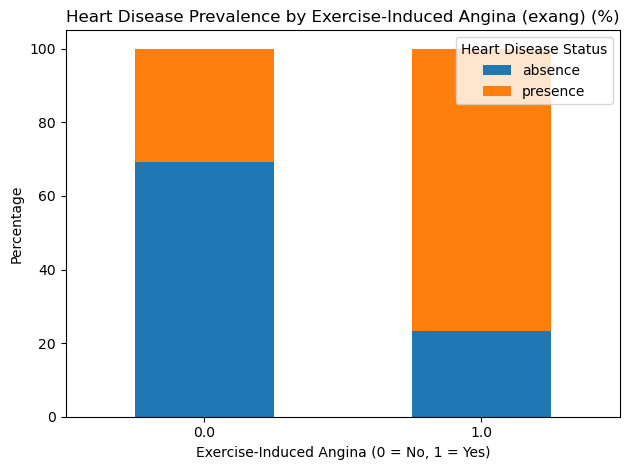

In [65]:
plt.clf()

# Create percentage contingency table
cp_exang = pd.crosstab(
    heart.exang,
    heart.heart_disease,
    normalize="index"
) * 100

cp_exang.plot(kind="bar", stacked=True)

plt.title("Heart Disease Prevalence by Exercise-Induced Angina (exang) (%)")
plt.ylabel("Percentage")
plt.xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
plt.xticks(rotation = 0)
plt.legend(title="Heart Disease Status")

plt.tight_layout()
plt.show()

In [66]:
# Create the hypothesis test
chi2_stat, pval, dof, expected = chi2_contingency(cp_tab)

print("p-value:", pval)

p-value: 2.819626859703792e-18


## Heart Disease Research – Part II Summary
### Key Findings

**1. Chest Pain Type (cp):**  
- Chest pain type is **strongly linked to heart disease outcomes**.  
- Asymptomatic patients show the **highest prevalence** of heart disease.  
- **Chi-square test:** p-value = 2.82e-18 → reject the null hypothesis (strong association).  
- **Stacked bar plot:** shows the percentage of patients with and without heart disease for each chest pain type.

**2. Exercise-Induced Angina (exang):**  
- Exercise-induced angina is a **strong indicator of heart disease risk**.  
- Patients with exang = 1 have a **much higher prevalence** of heart disease than those without.  
- **Stacked bar plot:** shows heart disease prevalence by exang status.

**3. Max Heart Rate During Exercise (thalach):**  
- Patients with heart disease tend to have **significantly lower maximum heart rates**, suggesting reduced cardiovascular performance.

**4. Age:**  
- Age is significantly associated with heart disease, with affected patients generally being older.

**5. Metabolic Risk Factors:**  
- Elevated cholesterol and high fasting blood sugar are significantly more common in patients with heart disease.

---

## Overall Conclusion

This analysis highlights the importance of **combining clinical symptoms (chest pain, exercise-induced angina), exercise test results (thalach), and metabolic indicators (cholesterol, fasting blood sugar)** when assessing heart disease risk.  
The findings reinforce that multiple factors together provide a clearer understanding of patient risk than any single metric alone.
